1 - Question

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('../datasets/Indian_Kids_Screen_Time.csv')

3 - Question

In [10]:
independent_features = [
    'Age',
    'Gender',
    'Primary_Device',
    'Educational_to_Recreational_Ratio',
    'Urban_or_Rural'
]

dependent_features = [
    'Avg_Daily_Screen_Time_hr',
    'Exceeded_Recommended_Limit',
    'Health_Impacts'
]

print("Independent Features:")
print("- " + "\n- ".join(independent_features))

print("\nDependent Features:")
print("- " + "\n- ".join(dependent_features))

print("\nReasoning:")
print("Based on the dataset's likely purpose of analyzing screen time and its effects, the independent features are those that might influence screen time or its impacts. These include demographic information (Age, Gender, Urban_or_Rural), primary device used, and the ratio of educational to recreational screen time.")
print("The dependent features are the outcomes being studied. These include the average daily screen time itself (Avg_Daily_Screen_Time_hr), whether the recommended limit is exceeded (Exceeded_Recommended_Limit), and the reported health impacts (Health_Impacts), which are likely consequences of screen time.")

Independent Features:
- Age
- Gender
- Primary_Device
- Educational_to_Recreational_Ratio
- Urban_or_Rural

Dependent Features:
- Avg_Daily_Screen_Time_hr
- Exceeded_Recommended_Limit
- Health_Impacts

Reasoning:
Based on the dataset's likely purpose of analyzing screen time and its effects, the independent features are those that might influence screen time or its impacts. These include demographic information (Age, Gender, Urban_or_Rural), primary device used, and the ratio of educational to recreational screen time.
The dependent features are the outcomes being studied. These include the average daily screen time itself (Avg_Daily_Screen_Time_hr), whether the recommended limit is exceeded (Exceeded_Recommended_Limit), and the reported health impacts (Health_Impacts), which are likely consequences of screen time.


4 - Question

In [11]:
display(df[5:18])

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
5,14,Female,4.88,Smartphone,True,0.44,Poor Sleep,Urban
6,17,Male,2.97,TV,False,0.48,NaN,Rural
7,10,Male,2.74,TV,True,0.54,NaN,Urban
8,14,Male,4.61,Laptop,True,0.36,"Poor Sleep, Anxiety",Rural
9,18,Male,3.24,Tablet,True,0.48,"Poor Sleep, Obesity Risk",Urban
10,18,Male,3.53,Tablet,True,0.44,Poor Sleep,Rural
11,15,Female,4.94,TV,True,0.36,Poor Sleep,Rural
12,12,Male,4.59,Smartphone,True,0.43,Poor Sleep,Urban
13,11,Male,6.08,TV,True,0.48,Eye Strain,Rural
14,15,Male,6.15,Smartphone,True,0.40,Poor Sleep,Urban


5 - Question

In [12]:
missing_values_per_feature = df.isnull().sum()
total_missing_values = missing_values_per_feature.sum()

print("Number of missing values per feature:")
print(missing_values_per_feature)

print(f"\nTotal number of missing values in the dataset: {total_missing_values}")

Number of missing values per feature:
Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64

Total number of missing values in the dataset: 3218


In [13]:
df['Health_Impacts'].fillna('No Impact', inplace=True)

missing_values_after_handling = df['Health_Impacts'].isnull().sum()
print(f"Number of missing values in 'Health_Impacts' after handling: {missing_values_after_handling}")

Number of missing values in 'Health_Impacts' after handling: 0


/tmp/ipython-input-13-2522926051.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Health_Impacts'].fillna('No Impact', inplace=True)


In [14]:
duplicate_rows = df.duplicated()
num_duplicate_rows = duplicate_rows.sum()

print(f"Number of duplicate rows before removal: {num_duplicate_rows}")

if num_duplicate_rows > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicate rows removed.")

num_duplicate_rows_after = df.duplicated().sum()
print(f"Number of duplicate rows after removal: {num_duplicate_rows_after}")

Number of duplicate rows before removal: 44
Duplicate rows removed.
Number of duplicate rows after removal: 0


In [15]:
display(df.describe())
display(df.info())

,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio
count,9668.000000,9668.000000,9668.000000
mean,12.992760,4.367780,0.427028
std,3.158931,1.703002,0.073185
min,8.000000,0.000000,0.300000
25%,10.000000,3.427500,0.370000
50%,13.000000,4.440000,0.430000
75%,16.000000,5.380000,0.480000
max,18.000000,13.890000,0.600000


<class 'pandas.core.frame.DataFrame'>
Index: 9668 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9668 non-null   int64  
 1   Gender                             9668 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9668 non-null   float64
 3   Primary_Device                     9668 non-null   object 
 4   Exceeded_Recommended_Limit         9668 non-null   bool   
 5   Educational_to_Recreational_Ratio  9668 non-null   float64
 6   Health_Impacts                     9668 non-null   object 
 7   Urban_or_Rural                     9668 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 613.7+ KB


None

In [16]:
mean_screen_time_exceeded = df[df['Exceeded_Recommended_Limit'] == True]['Avg_Daily_Screen_Time_hr'].mean()
print(f"The mean 'Avg_Daily_Screen_Time_hr' for observations where 'Exceeded_Recommended_Limit' is True is: {mean_screen_time_exceeded:.2f}")

The mean 'Avg_Daily_Screen_Time_hr' for observations where 'Exceeded_Recommended_Limit' is True is: 4.82


In [17]:
summary = """
Dataset Summary:

The dataset contains information related to Indian kids' screen time.
Initial inspection revealed the following:
- The dataset originally contained 9712 rows and 8 columns.
- Missing values were present only in the 'Health_Impacts' column (3218 missing values).
- 44 duplicate rows were identified.

Data Cleaning and Handling:
- Missing values in the 'Health_Impacts' column were handled by replacing them with the constant 'No Impact'.
- Duplicate rows were removed, resulting in a cleaned dataset with 9668 rows.

Feature Identification:
- Independent Features identified: Age, Gender, Primary_Device, Educational_to_Recreational_Ratio, Urban_or_Rural. These are considered potential factors influencing screen time and its impacts.
- Dependent Features identified: Avg_Daily_Screen_Time_hr, Exceeded_Recommended_Limit, Health_Impacts. These are considered the outcomes being studied.

Descriptive Analysis:
- The `.describe()` method provided summary statistics for numerical features, showing the distribution of Age, Avg_Daily_Screen_Time_hr, and Educational_to_Recreational_Ratio.
- The `.info()` method confirmed the data types and non-null counts for each column after cleaning, showing no missing values remaining.

Specific Calculation:
- The mean 'Avg_Daily_Screen_Time_hr' for observations where 'Exceeded_Recommended_Limit' is True was calculated to be approximately 4.82 hours.

Overall, the dataset has been loaded, inspected, and cleaned by addressing missing values and duplicates. Initial descriptive analysis provides insights into the data distribution, and specific calculations highlight key relationships within the data.
"""

print(summary)


Dataset Summary:

The dataset contains information related to Indian kids' screen time.
Initial inspection revealed the following:
- The dataset originally contained 9712 rows and 8 columns.
- Missing values were present only in the 'Health_Impacts' column (3218 missing values).
- 44 duplicate rows were identified.

Data Cleaning and Handling:
- Missing values in the 'Health_Impacts' column were handled by replacing them with the constant 'No Impact'.
- Duplicate rows were removed, resulting in a cleaned dataset with 9668 rows.

Feature Identification:
- Independent Features identified: Age, Gender, Primary_Device, Educational_to_Recreational_Ratio, Urban_or_Rural. These are considered potential factors influencing screen time and its impacts.
- Dependent Features identified: Avg_Daily_Screen_Time_hr, Exceeded_Recommended_Limit, Health_Impacts. These are considered the outcomes being studied.

Descriptive Analysis:
- The `.describe()` method provided summary statistics for numerical f

6 - Question

<Figure size 1000x600 with 0 Axes>

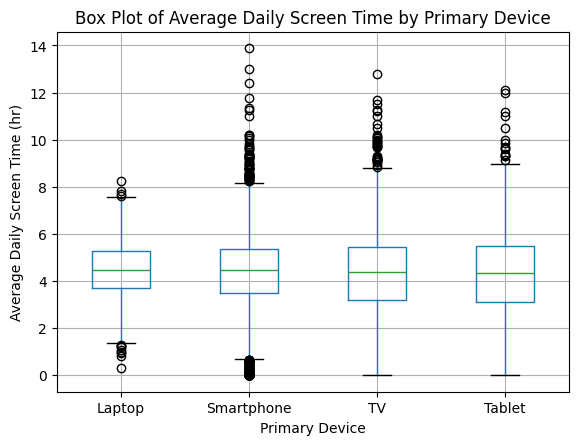

In [18]:
plt.figure(figsize=(10, 6))
df.boxplot(column='Avg_Daily_Screen_Time_hr', by='Primary_Device')
plt.title('Box Plot of Average Daily Screen Time by Primary Device')
plt.suptitle('')
plt.xlabel('Primary Device')
plt.ylabel('Average Daily Screen Time (hr)')
plt.show()

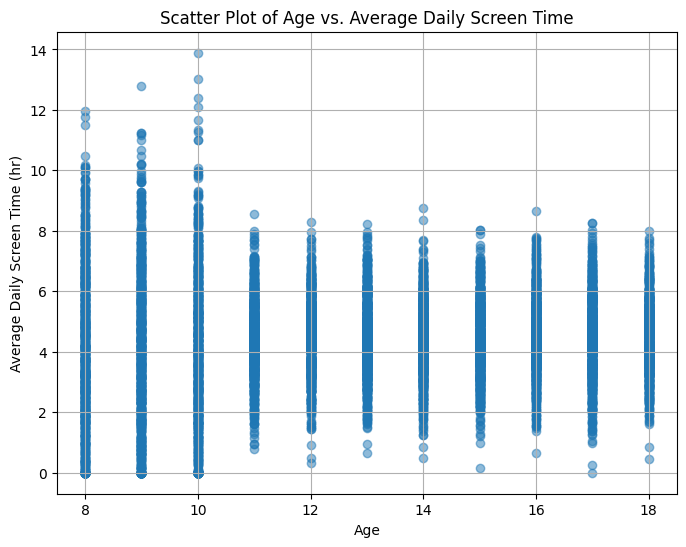

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Avg_Daily_Screen_Time_hr'], alpha=0.5)
plt.title('Scatter Plot of Age vs. Average Daily Screen Time')
plt.xlabel('Age')
plt.ylabel('Average Daily Screen Time (hr)')
plt.grid(True)
plt.show()

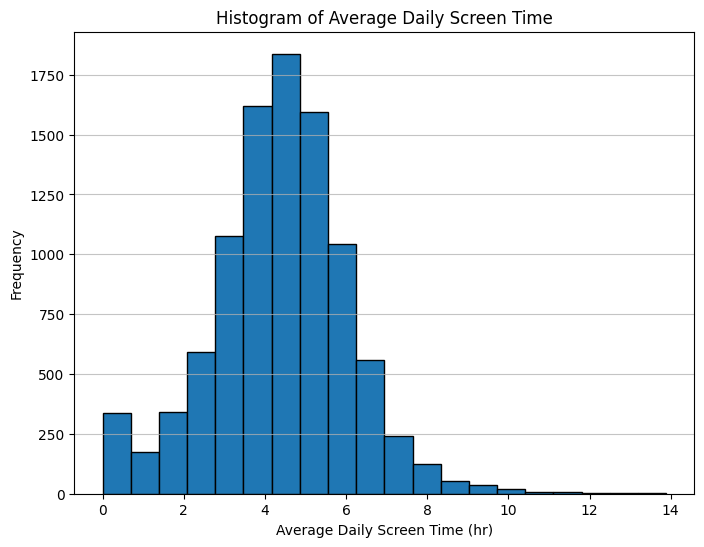

In [20]:
plt.figure(figsize=(8, 6))
plt.hist(df['Avg_Daily_Screen_Time_hr'], bins=20, edgecolor='black')
plt.title('Histogram of Average Daily Screen Time')
plt.xlabel('Average Daily Screen Time (hr)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

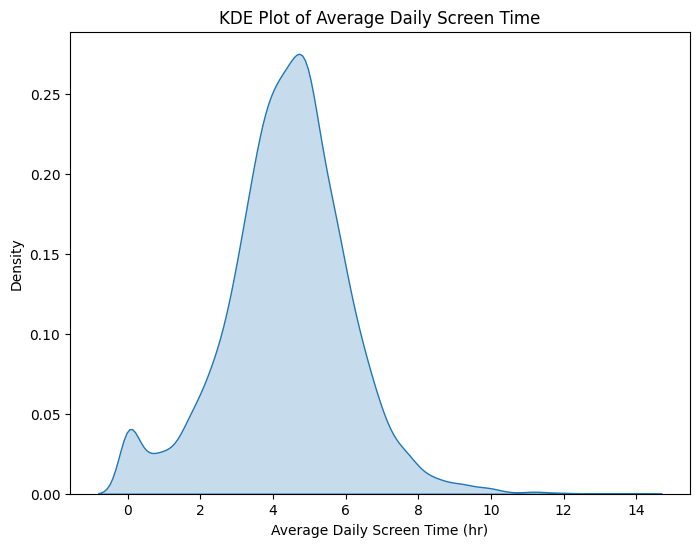

In [21]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.kdeplot(df['Avg_Daily_Screen_Time_hr'], fill=True)
plt.title('KDE Plot of Average Daily Screen Time')
plt.xlabel('Average Daily Screen Time (hr)')
plt.ylabel('Density')
plt.show()

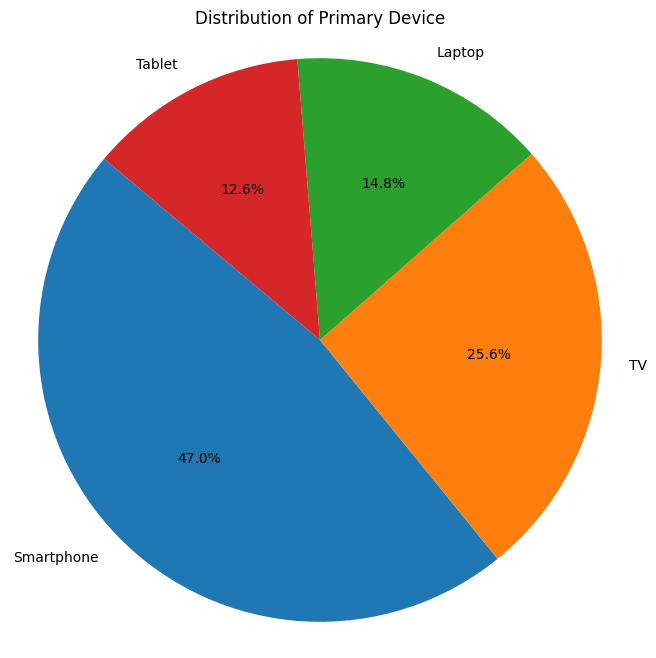

In [22]:
device_counts = df['Primary_Device'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Primary Device')
plt.axis('equal')
plt.show()

Correlation Analysis - HeatMap & Min Max Scaling

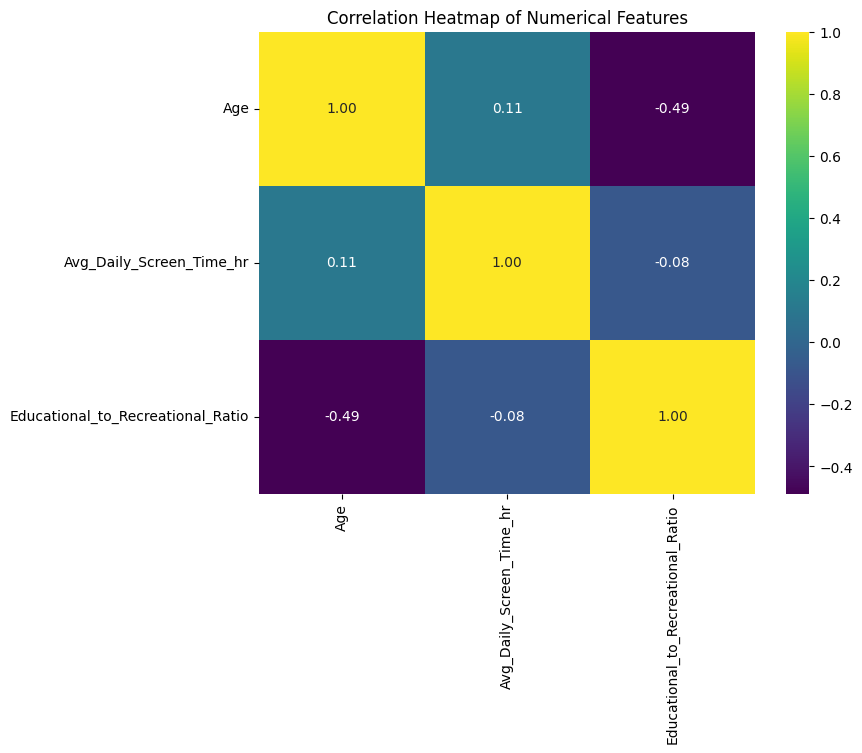

In [27]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
plt.figure(figsize=(8, 6))

numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

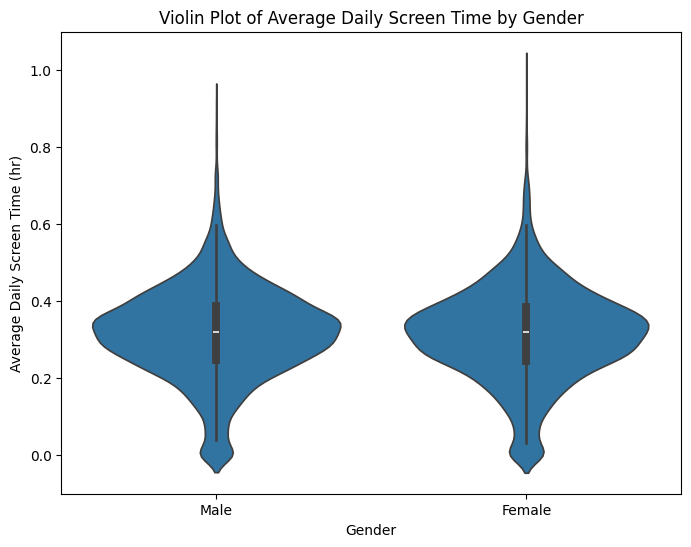

In [29]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Gender', y='Avg_Daily_Screen_Time_hr', data=df)
plt.title('Violin Plot of Average Daily Screen Time by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Daily Screen Time (hr)')
plt.show()